# All packages that are required to dowload

In [1]:
# Install Libraries
#!pip install textblob
#!pip install tweepy
#!pip install pycountry
#!pip install wordcloud
#!pip install langdetect

# Importing the different Libraries

In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

# Defining the accesses
IMPORTANT: The ConsumetKey, ConsumerSecret, Access Token and Access Token Secret depends on each account!

In [3]:
#THIS DEPENDS ON EACH ACCOUNT! Be sure to put your own Twitter developer information.
# Authentication

consumerKey = 'u7YcUuz6BavLURy6fpDGDezGw'
consumerSecret = 'dPHexTbRAbwFgkgPqAMGM6f6Ey3f6dFdiMPogYShQm3vQvaHPb'

accessToken = '1447570345645518849-9QmXnYVRPJCxNPlZchgiiIPOERqXeR'
accessTokenSecret = 'F36pnkFX7C3jjLtzKvOJwVG4GO9KAR5MGoCUpKOwxtEEJ'

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [41]:
tweepy.API?

In [4]:
# %Percentage over the total that is positive,neg,else:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [5]:
# Word to search: Defined as input: Mehmet Oz vs John Karl Fetterman
keyword = input('Please enter keyword or hashtag to search: ')
# Total of tweets to analyze
noOfTweet = int(input ('Please enter how many tweets to analyze: '))

Please enter keyword or hashtag to search: Fetterman
Please enter how many tweets to analyze: 1


In [6]:
#Using the API(Tweeoy.API), we search for the Keyword
tweets = tweepy.Cursor(api.search_tweets , q=keyword).items(noOfTweet)

In [7]:
#listTweets = list(tweets)

In [8]:
#listTweets[0].created_at

NOTE: Everytime that tweet.Cursor is runned, different Tweets are being selected!

In [9]:
#Initialization
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [10]:
for tweet in tweets:
    tweet_list.append(tweet.text)
    #print(tweet_list)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    print(score)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6908}


In [11]:
SentimentIntensityAnalyzer().polarity_scores(tweet.text)

{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6908}

In [12]:
print(positive, negative, neutral,polarity)

100.0 0.0 0.0 0.0


In [13]:
print(len(tweet_list))

1


In [14]:
tweet_list

["@DrOz @ByronYork Fetterman's loyalties are with the United States."]

In [15]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list), ' as percetage: ',len(positive_list)/len(tweet_list)*100,'%' )
print('negative number: ', len(negative_list), ' as percetage: ',len(negative_list)/len(tweet_list)*100,'%')
print('neutral number: ',len(neutral_list), ' as percetage: ',len(neutral_list)/len(tweet_list)*100,'%') 

if (len(positive_list)+len(negative_list)+len(neutral_list)) == len(tweet_list):
    print('Verification OK')
else:
    print('Not 100% twitters are analyzed')

total number:  1
positive number:  1  as percetage:  100.0 %
negative number:  0  as percetage:  0.0 %
neutral number:  0  as percetage:  0.0 %
Verification OK


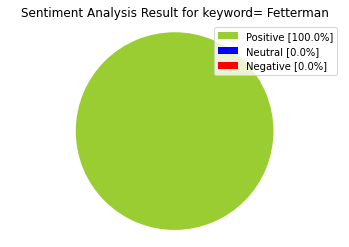

In [16]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis("equal")
plt.show()

In [17]:
tweet_list.drop_duplicates(inplace = True)
len(tweet_list)

1

In [18]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@DrOz @ByronYork Fetterman's loyalties are wit...,@DrOz @ByronYork Fetterman's loyalties are wit...


In [19]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@DrOz @ByronYork Fetterman's loyalties are wit...,fetterman s loyalties are with the united ...


In [20]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@DrOz @ByronYork Fetterman's loyalties are wit...,fetterman s loyalties are with the united ...,0.0,0.0,positive,0.0,0.467,0.533,0.6908


In [21]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [22]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [23]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,1,100.0


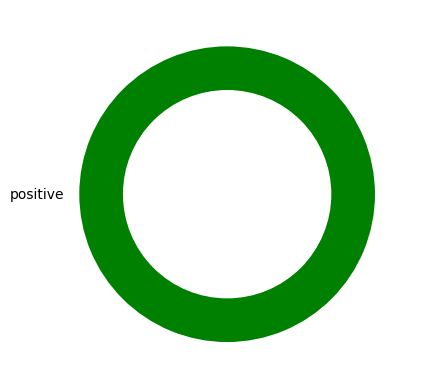

In [24]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [25]:
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  #mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


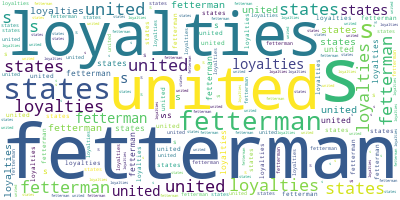

In [26]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

In [27]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
positive,53.0


In [28]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
positive,8.0


In [29]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [30]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [31]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [32]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [33]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [34]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@DrOz @ByronYork Fetterman's loyalties are wit...,fetterman s loyalties are with the united ...,0.0,0.0,positive,0.0,0.467,0.533,0.6908,53,8,fetterman s loyalties are with the united ...,"[, fetterman, s, loyalties, are, with, the, un...","[, fetterman, loyalties, united, states, ]","[, fetterman, loyalti, unit, state, ]"


In [35]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1 Number of reviews has 5 words


In [36]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Users\JuliJaramillo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,fetterman,loyalti,state,unit
0,2,1,1,1,1


In [37]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
fetterman,1
loyalti,1
state,1
unit,1


In [38]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [39]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('fetterman loyalties', 1), ('loyalties united', 1), ('united states', 1)]

In [40]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('fetterman loyalties united', 1), ('loyalties united states', 1)]